In [ ]:
import cv2
import numpy as np

class YOLOModel:
    def __init__(self, weights_path="yolov3.weights", config_path="yolov3.cfg", class_labels_path="coco.names"):
        # Load YOLO model and class labels
        self.net = cv2.dnn.readNet(weights_path, config_path)
        with open(class_labels_path, 'r') as f:
            self.classes = [line.strip() for line in f.readlines()]

        # Get output layer names
        self.output_layers = self.net.getUnconnectedOutLayersNames()

        # Check if the YOLO model is loaded successfully
        print(self.net)

        # Check the number of unconnected output layers
        print(len(self.net.getUnconnectedOutLayers()))

        # Print the names of the unconnected output layers
        print(self.output_layers)

    # def detect_objects(self, image):
    #     # Perform forward pass of YOLO object detection
    #     blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    #     self.net.setInput(blob)
    #     outs = self.net.forward(self.output_layers)
    #
    #     # Process the detections
    #     detected_objects = []
    #     for out in outs:
    #         for detection in out:
    #             scores = detection[5:]
    #             class_id = np.argmax(scores)
    #             confidence = scores[class_id]
    #             if confidence > 0.5:  # Threshold for confidence
    #                 # Get object coordinates
    #                 center_x = int(detection[0] * image.shape[1])
    #                 center_y = int(detection[1] * image.shape[0])
    #                 w = int(detection[2] * image.shape[1])
    #                 h = int(detection[3] * image.shape[0])
    #
    #                 # Rectangle coordinates
    #                 x_min = int(center_x - w / 2)
    #                 y_min = int(center_y - h / 2)
    #                 x_max = int(center_x + w / 2)
    #                 y_max = int(center_y + h / 2)
    #
    #                 # Store detected object information
    #                 detected_objects.append({
    #                     "class": self.classes[class_id],
    #                     "confidence": confidence,
    #                     "x_min": x_min,
    #                     "y_min": y_min,
    #                     "x_max": x_max,
    #                     "y_max": y_max
    #                 })
    #
    #                 # Draw bounding box and label on the image
    #                 cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    #                 cv2.putText(image, f"{self.classes[class_id]}: {confidence:.2f}", (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    #
    #     return image, detected_objects

    def detect_objects(self, image):
        # Perform forward pass of YOLO object detection
        blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        self.net.setInput(blob)
        outs = self.net.forward(self.output_layers)

        # Process the detections
        detected_objects = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:  # Threshold for confidence
                    # Get object coordinates
                    center_x = int(detection[0] * image.shape[1])
                    center_y = int(detection[1] * image.shape[0])
                    w = int(detection[2] * image.shape[1])
                    h = int(detection[3] * image.shape[0])

                    # Rectangle coordinates
                    x_min = int(center_x - w / 2)
                    y_min = int(center_y - h / 2)
                    x_max = int(center_x + w / 2)
                    y_max = int(center_y + h / 2)

                    # Store detected object information
                    detected_objects.append({
                        "class": self.classes[class_id],
                        "confidence": confidence,
                        "x_min": x_min,
                        "y_min": y_min,
                        "x_max": x_max,
                        "y_max": y_max
                    })

                    # Draw bounding box and label on the image
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    cv2.putText(image, f"{self.classes[class_id]}: {confidence:.2f}", (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        return image, detected_objects

# Example usage:
# Load the YOLO model
yolo_model = YOLOModel()

# Read an image
image = cv2.imread("image.png")

# Perform object detection
detected_objects = yolo_model.detect_objects(image)

# Print detected objects
"""
for obj in detected_objects:
    print("Class:", obj["class"])
    print("Confidence:", obj["confidence"])
    print("Bounding box coordinates:", obj["x_min"], obj["y_min"], obj["x_max"], obj["y_max"])
"""
# Print detected objects
print(detected_objects)
for obj in detected_objects:
    print("Object:", obj)


< cv2.dnn.Net 0x7c9c9997cb10>
3
('yolo_82', 'yolo_94', 'yolo_106')
(array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 254, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
      

< cv2.dnn.Net 0x7c9c9997d770>
3
('yolo_82', 'yolo_94', 'yolo_106')
detected objects


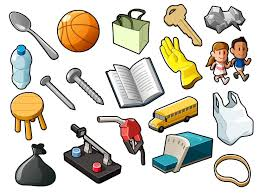

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

class YOLOModel:
    def __init__(self, weights_path="yolov3.weights", config_path="yolov3.cfg", class_labels_path="coco.names"):
        # Load YOLO model and class labels
        self.net = cv2.dnn.readNet(weights_path, config_path)
        with open(class_labels_path, 'r') as f:
            self.classes = [line.strip() for line in f.readlines()]

        # Get output layer names
        self.output_layers = self.net.getUnconnectedOutLayersNames()

        # Check if the YOLO model is loaded successfully
        print(self.net)

        # Check the number of unconnected output layers
        print(len(self.net.getUnconnectedOutLayers()))

        # Print the names of the unconnected output layers
        print(self.output_layers)

    def detect_objects(self, image):
        # Perform forward pass of YOLO object detection
        blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        self.net.setInput(blob)
        outs = self.net.forward(self.output_layers)

        # Process the detections
        detected_objects = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:  # Threshold for confidence
                    # Get object coordinates
                    center_x = int(detection[0] * image.shape[1])
                    center_y = int(detection[1] * image.shape[0])
                    w = int(detection[2] * image.shape[1])
                    h = int(detection[3] * image.shape[0])

                    # Rectangle coordinates
                    x_min = int(center_x - w / 2)
                    y_min = int(center_y - h / 2)
                    x_max = int(center_x + w / 2)
                    y_max = int(center_y + h / 2)

                    # Store detected object information
                    detected_objects.append({
                        "class": self.classes[class_id],
                        "confidence": confidence,
                        "x_min": x_min,
                        "y_min": y_min,
                        "x_max": x_max,
                        "y_max": y_max
                    })

                    # Draw bounding box and label on the image
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    cv2.putText(image, f"{self.classes[class_id]}: {confidence:.2f}", (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        return image, detected_objects

# Example usage:
# Load the YOLO model
yolo_model = YOLOModel()

# Read an image
image = cv2.imread("image.png")

# Perform object detection
modified_image, detected_objects = yolo_model.detect_objects(image)

# Print detected objects
for obj in detected_objects:
    print("Class:", obj["class"])
    print("Confidence:", obj["confidence"])
    print("Bounding box coordinates:", obj["x_min"], obj["y_min"], obj["x_max"], obj["y_max"])

# Display the modified image with bounding boxes and labels
print("detected objects")
cv2_imshow(modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


< cv2.dnn.Net 0x7c9c9997f710>
3
('yolo_82', 'yolo_94', 'yolo_106')
deteected object


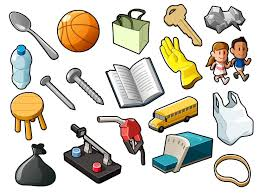

In [14]:
import cv2
import numpy as np

class YOLOModel:
    def __init__(self, weights_path="yolov3.weights", config_path="yolov3.cfg", class_labels_path="coco.names"):
        # Load YOLO model and class labels
        self.net = cv2.dnn.readNet(weights_path, config_path)
        with open(class_labels_path, 'r') as f:
            self.classes = [line.strip() for line in f.readlines()]

        # Get output layer names
        self.output_layers = self.net.getUnconnectedOutLayersNames()

        # Check if the YOLO model is loaded successfully
        print(self.net)

        # Check the number of unconnected output layers
        print(len(self.net.getUnconnectedOutLayers()))

        # Print the names of the unconnected output layers
        print(self.output_layers)

    def detect_objects(self, image, confidence_threshold=0.5):
        # Perform forward pass of YOLO object detection
        blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        self.net.setInput(blob)
        outs = self.net.forward(self.output_layers)

        # Process the detections
        detected_objects = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > confidence_threshold:  # Threshold for confidence
                    # Get object coordinates
                    center_x = int(detection[0] * image.shape[1])
                    center_y = int(detection[1] * image.shape[0])
                    w = int(detection[2] * image.shape[1])
                    h = int(detection[3] * image.shape[0])

                    # Rectangle coordinates
                    x_min = int(center_x - w / 2)
                    y_min = int(center_y - h / 2)
                    x_max = int(center_x + w / 2)
                    y_max = int(center_y + h / 2)

                    # Store detected object information
                    detected_objects.append({
                        "class": self.classes[class_id],
                        "confidence": confidence,
                        "x_min": x_min,
                        "y_min": y_min,
                        "x_max": x_max,
                        "y_max": y_max
                    })

                    # Draw bounding box and label on the image
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    cv2.putText(image, f"{self.classes[class_id]}: {confidence:.2f}", (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        return image, detected_objects

# Example usage:
# Load the YOLO model
yolo_model = YOLOModel()

# Read an image
image = cv2.imread("image.png")

# Perform object detection
modified_image, detected_objects = yolo_model.detect_objects(image)

# Print detected objects
for obj in detected_objects:
    print("Class:", obj["class"])
    print("Confidence:", obj["confidence"])
    print("Bounding box coordinates:", obj["x_min"], obj["y_min"], obj["x_max"], obj["y_max"])

# Display the modified image with bounding boxes and labels
print("deteected object")
cv2_imshow(modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


< cv2.dnn.Net 0x7c9c9997d770>
3
('yolo_82', 'yolo_94', 'yolo_106')
Detected Objects:


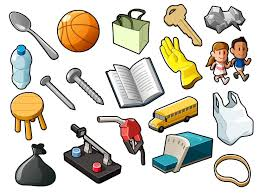

Modified image saved as modified_image.png


In [15]:
import cv2
import numpy as np

class YOLOModel:
    def __init__(self, weights_path="yolov3.weights", config_path="yolov3.cfg", class_labels_path="coco.names"):
        # Load YOLO model and class labels
        self.net = cv2.dnn.readNet(weights_path, config_path)
        with open(class_labels_path, 'r') as f:
            self.classes = [line.strip() for line in f.readlines()]

        # Get output layer names
        self.output_layers = self.net.getUnconnectedOutLayersNames()

        # Check if the YOLO model is loaded successfully
        print(self.net)

        # Check the number of unconnected output layers
        print(len(self.net.getUnconnectedOutLayers()))

        # Print the names of the unconnected output layers
        print(self.output_layers)

    def detect_objects(self, image, confidence_threshold=0.5):
        # Perform forward pass of YOLO object detection
        blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        self.net.setInput(blob)
        outs = self.net.forward(self.output_layers)

        # Process the detections
        detected_objects = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > confidence_threshold:  # Threshold for confidence
                    # Get object coordinates
                    center_x = int(detection[0] * image.shape[1])
                    center_y = int(detection[1] * image.shape[0])
                    w = int(detection[2] * image.shape[1])
                    h = int(detection[3] * image.shape[0])

                    # Rectangle coordinates
                    x_min = int(center_x - w / 2)
                    y_min = int(center_y - h / 2)
                    x_max = int(center_x + w / 2)
                    y_max = int(center_y + h / 2)

                    # Store detected object information
                    detected_objects.append({
                        "class": self.classes[class_id],
                        "confidence": confidence,
                        "x_min": x_min,
                        "y_min": y_min,
                        "x_max": x_max,
                        "y_max": y_max
                    })

                    # Draw bounding box and label on the image
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    cv2.putText(image, f"{self.classes[class_id]}: {confidence:.2f}", (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        return image, detected_objects

# Example usage:
# Load the YOLO model
yolo_model = YOLOModel()

# Read an image
image = cv2.imread("image.png")

# Perform object detection
modified_image, detected_objects = yolo_model.detect_objects(image)

# Print detected objects
print("Detected Objects:")
for obj in detected_objects:
    print("Class:", obj["class"])
    print("Confidence:", obj["confidence"])
    print("Bounding box coordinates:", obj["x_min"], obj["y_min"], obj["x_max"], obj["y_max"])

# Display the modified image with bounding boxes and labels
cv2_imshow(modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the modified image to a file
cv2.imwrite("modified_image.png", modified_image)
print("Modified image saved as modified_image.png")


< cv2.dnn.Net 0x7c9ca8ac19b0>
3
('yolo_82', 'yolo_94', 'yolo_106')


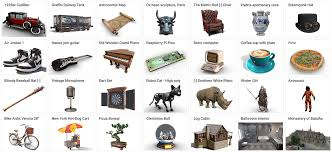

In [21]:
import cv2
import numpy as np

class YOLOModel:
    def __init__(self, weights_path="yolov3.weights", config_path="yolov3.cfg", class_labels_path="coco.names"):
        # Load YOLO model and class labels
        self.net = cv2.dnn.readNet(weights_path, config_path)
        with open(class_labels_path, 'r') as f:
            self.classes = [line.strip() for line in f.readlines()]

        # Get output layer names
        self.output_layers = self.net.getUnconnectedOutLayersNames()

        # Check if the YOLO model is loaded successfully
        print(self.net)

        # Check the number of unconnected output layers
        print(len(self.net.getUnconnectedOutLayers()))

        # Print the names of the unconnected output layers
        print(self.output_layers)

    def detect_objects(self, image, confidence_threshold=0.5):
        # Perform forward pass of YOLO object detection
        blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        self.net.setInput(blob)
        outs = self.net.forward(self.output_layers)

        # Process the detections
        detected_objects = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > confidence_threshold:  # Threshold for confidence
                    # Get object coordinates
                    center_x = int(detection[0] * image.shape[1])
                    center_y = int(detection[1] * image.shape[0])
                    w = int(detection[2] * image.shape[1])
                    h = int(detection[3] * image.shape[0])

                    # Rectangle coordinates
                    x_min = int(center_x - w / 2)
                    y_min = int(center_y - h / 2)
                    x_max = int(center_x + w / 2)
                    y_max = int(center_y + h / 2)

                    # Store detected object information
                    detected_objects.append({
                        "class": self.classes[class_id],
                        "confidence": confidence,
                        "x_min": x_min,
                        "y_min": y_min,
                        "x_max": x_max,
                        "y_max": y_max
                    })

                    # Draw bounding box and label on the image
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    cv2.putText(image, f"{self.classes[class_id]}: {confidence:.2f}", (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        return image, detected_objects

# Example usage:
# Load the YOLO model
yolo_model = YOLOModel()

# Read an image
image = cv2.imread("images .png")

# Perform object detection
modified_image, detected_objects = yolo_model.detect_objects(image)

# Check if detected objects list is not empty
if detected_objects:
    print("Detected Objects:")
    for obj in detected_objects:
        print("Class:", obj["class"])
        print("Confidence:", obj["confidence"])
        print("Bounding box coordinates:", obj["x_min"], obj["y_min"], obj["x_max"], obj["y_max"])

# Display the modified image with bounding boxes and labels
cv2_imshow(modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
